In [1]:
#https://www.kaggle.com/code/kamyarazar/stock-price-prediction-lstm-hyperparameter-tuning/notebook
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import itertools
import random
import os

In [2]:
data = pd.read_csv("C:/Users/techt/Downloads/hotel_with_UC7.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,Date,booking_rooms,sold_rooms,occupancy_rate,ORI,ARI,RevPAR,RGI,Revenue_per_day,TRevPAR
0,City Hotel,1,88,2015,July,27,1,0,4,2,...,01-07-2015,78,64.0,18.879056,0.986387,1.007586,1444.247788,1.157188,4896.0,414.476031
1,City Hotel,1,65,2015,July,27,1,0,4,1,...,01-07-2015,78,64.0,18.879056,0.986387,1.007586,1283.775811,1.157188,4352.0,414.476031
2,City Hotel,1,92,2015,July,27,1,2,4,2,...,01-07-2015,78,64.0,18.879056,0.986387,1.007586,1444.247788,1.157188,4896.0,414.476031
3,City Hotel,1,100,2015,July,27,2,0,2,2,...,02-07-2015,49,1.0,0.294985,0.015412,0.632036,22.566372,0.011666,76.5,2.748123
4,City Hotel,1,79,2015,July,27,2,0,3,2,...,02-07-2015,49,1.0,0.294985,0.015412,0.632036,22.566372,0.011666,76.5,2.748123


In [3]:
data.iloc[:, 2:-1].describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,total_of_special_requests,Month_number,booking_rooms,sold_rooms,occupancy_rate,ORI,ARI,RevPAR,RGI,Revenue_per_day
count,117431.000000,117431.000000,117431.000000,117431.000000,117431.000000,117431.000000,117431.000000,117427.000000,117431.000000,117431.00000,...,117431.000000,117431.000000,117431.000000,117299.000000,117299.000000,117299.000000,117431.000000,117299.000000,116951.000000,117299.000000
mean,105.085105,2016.160281,27.136633,15.802727,0.936448,2.521251,1.860633,0.104507,0.007868,0.02788,...,0.571033,6.546031,104.422044,59.643586,19.864430,1.019811,1.289706,2060.534557,1.625151,6265.596032
std,106.906879,0.706566,13.575714,8.783601,0.995796,1.893761,0.482100,0.399695,0.097168,0.16463,...,0.791654,3.083511,58.112335,27.083530,7.998498,0.412241,0.446160,1241.819049,1.192547,4073.092411
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,2.000000,1.000000,0.294985,0.015412,0.396968,-151.488585,0.009952,-331.760000
25%,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.00000,...,0.000000,4.000000,60.000000,38.000000,14.749263,0.744868,0.894139,1169.616519,0.895140,3246.300000
50%,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.00000,...,0.000000,7.000000,95.000000,57.000000,19.174041,0.970974,1.375418,1873.746313,1.315853,5654.250000
75%,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.00000,...,1.000000,9.000000,137.000000,76.000000,23.744292,1.217571,1.604940,2714.873722,2.010095,8453.000000
max,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,10.000000,10.000000,1.00000,...,5.000000,12.000000,339.000000,202.000000,59.587021,3.113283,3.465271,106725.663700,10.263731,361800.000000


In [4]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Month_number', 'Date',
       'booking_rooms', 'sold_rooms', 'occupancy_rate', 'ORI', 'ARI', 'RevPAR',
       'RGI', 'Revenue_per_day', 'TRevPAR'],
      dtype='object')

In [5]:
df1=data[['Date','occupancy_rate','ARI','RevPAR','TRevPAR','adr','is_repeated_guest','total_of_special_requests']].groupby(['Date']).mean()

In [6]:
df1=df1.astype('float32')

In [7]:
sc = MinMaxScaler(feature_range=(0, 1))
data_prices_scaled = sc.fit_transform(df1)

In [8]:
data_prices_scaled

array([[0.05944508, 0.28974605, 0.0853593 , ..., 0.3411736 , 0.05113637,
        0.41263962],
       [0.25811952, 0.35009408, 0.2532023 , ..., 0.26906765, 0.        ,
        0.39897132],
       [0.12245229, 0.54112643, 0.07226881, ..., 0.09857592, 0.4717742 ,
        0.24434061],
       ...,
       [0.33760494, 0.46545702, 0.3098494 , ..., 0.28226608, 0.04655172,
        0.7099209 ],
       [0.22696199, 0.14913923, 0.3173109 , ..., 0.5253983 , 0.0375    ,
        0.3653634 ],
       [0.11242217, 0.14747596, 0.23638177, ..., 0.76299846, 0.11842106,
        0.6116974 ]], dtype=float32)

In [9]:
data_prices_scaled.shape

(793, 7)

In [10]:
# Creating a data structure (it does not work when you have only one feature)
def create_data(df, n_future, n_past, train_test_split_percentage, validation_split_percentage):
    n_feature = df.shape[1]
    x_data, y_data = [], []
    
    for i in range(n_past, len(df) - n_future + 1):
        x_data.append(df[i - n_past:i, 0:n_feature])
        y_data.append(df[i + n_future - 1:i + n_future, 0])
    
    split_training_test_starting_point = int(round(train_test_split_percentage*len(x_data)))
    split_train_validation_starting_point = int(round(split_training_test_starting_point*(1-validation_split_percentage)))
    
    x_train = x_data[:split_train_validation_starting_point]
    y_train = y_data[:split_train_validation_starting_point]
    
    # if you want to choose the validation set by yourself, uncomment the below code.
    x_val = x_data[split_train_validation_starting_point:split_training_test_starting_point]
    y_val =  x_data[split_train_validation_starting_point:split_training_test_starting_point]                                             
    
    x_test = x_data[split_training_test_starting_point:]
    y_test = y_data[split_training_test_starting_point:]
    
    return np.array(x_train), np.array(x_test), np.array(x_val), np.array(y_train), np.array(y_test), np.array(y_val)

In [11]:
X_train, X_test, X_val, y_train, y_test, y_val = create_data(data_prices_scaled, n_future=1, n_past=25, train_test_split_percentage=0.8,
                                               validation_split_percentage = 0)

In [12]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(614, 25, 7)
(154, 25, 7)
(614, 1)
(154, 1)


In [13]:
# ------------------LSTM-----------------------
# ------------------LSTM-----------------------
regressor = Sequential()
regressor.add(LSTM(units=16, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=16, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=16, return_sequences=True))
regressor.add(Dense(units=1, activation='linear'))
regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25, 16)            1536      
                                                                 
 dropout (Dropout)           (None, 25, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25, 16)            2112      
                                                                 
 dropout_1 (Dropout)         (None, 25, 16)            0         
                                                                 
 lstm_2 (LSTM)               (None, 25, 16)            2112      
                                                                 
 dense (Dense)               (None, 25, 1)             17        
                                                                 
Total params: 5,777
Trainable params: 5,777
Non-trainabl

In [14]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
#mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit model
history = regressor.fit(X_train, y_train, validation_split=0.3, epochs=2000, batch_size=1, callbacks=[es])

Epoch 1/2000
429/429 [==============================] - 11s 18ms/step - loss: 0.0200 - root_mean_squared_error: 0.1413 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1311
Epoch 2/2000
429/429 [==============================] - 6s 15ms/step - loss: 0.0162 - root_mean_squared_error: 0.1273 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1289
Epoch 3/2000
429/429 [==============================] - 7s 15ms/step - loss: 0.0157 - root_mean_squared_error: 0.1252 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1289
Epoch 4/2000
429/429 [==============================] - 7s 15ms/step - loss: 0.0158 - root_mean_squared_error: 0.1257 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1282
Epoch 5/2000
429/429 [==============================] - 6s 14ms/step - loss: 0.0153 - root_mean_squared_error: 0.1237 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1301
Epoch 6/2000
429/429 [==============================] - 6s 14ms/step - loss: 0.0152 - root_mean_squared_error: 0.1235 - val_

In [15]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

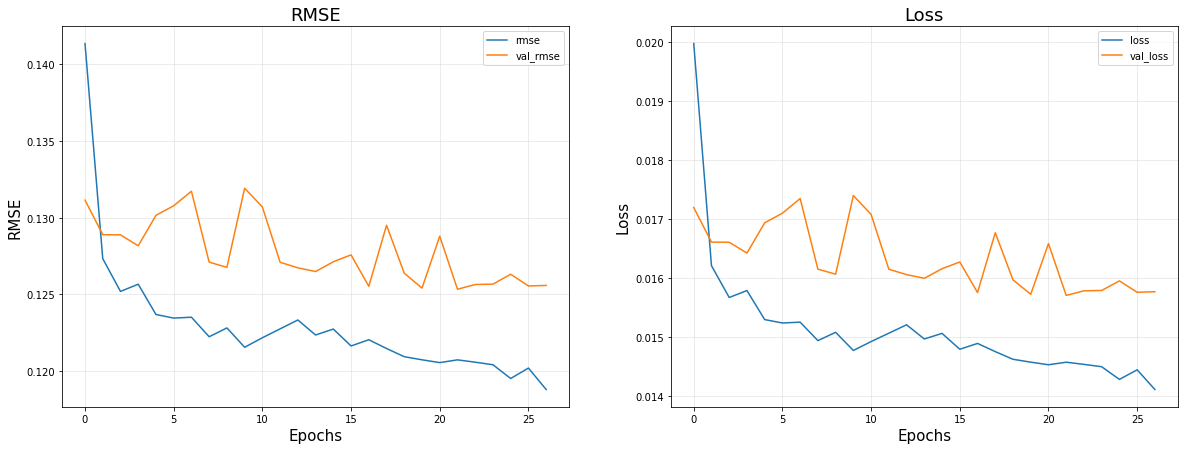

In [16]:
fig = plt.figure(figsize=(20,7))
fig.add_subplot(121)

# Accuracy
plt.plot(history.epoch, history.history['root_mean_squared_error'], label = "rmse")
plt.plot(history.epoch, history.history['val_root_mean_squared_error'], label = "val_rmse")

plt.title("RMSE", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()


#Adding Subplot 1 (For Loss)
fig.add_subplot(122)

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [17]:
results = regressor.evaluate(X_test, y_test)
print("test loss, test acc:", np.round(results, 4))

5/5 [==============================] - 2s 9ms/step - loss: 0.0159 - root_mean_squared_error: 0.1260
test loss, test acc: [0.0159 0.126 ]


In [18]:
def LSTM_HyperParameter_Tuning(config, x_train, y_train, x_test, y_test):
    
    first_additional_layer, second_additional_layer, third_additional_layer,fourth_additional_layer, n_neurons, n_batch_size, dropout = config
    possible_combinations = list(itertools.product(first_additional_layer, second_additional_layer, third_additional_layer,fourth_additional_layer,
                                                  n_neurons, n_batch_size, dropout))
    
    print(possible_combinations)
    print('\n')
    
    hist = []
    
    for i in range(0, len(possible_combinations)):
        
        print(f'{i+1}th combination: \n')
        print('--------------------------------------------------------------------')
        
        first_additional_layer, second_additional_layer, third_additional_layer,fourth_additional_layer, n_neurons, n_batch_size, dropout = possible_combinations[i]
        
        # instantiating the model in the strategy scope creates the model on the TPU
        #with tpu_strategy.scope():
        regressor = Sequential()
        regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
        regressor.add(Dropout(dropout))

        if first_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if second_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if third_additional_layer:
            regressor.add(GRU(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))
            
        if fourth_additional_layer:
            regressor.add(GRU(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        regressor.add(LSTM(units=n_neurons, return_sequences=False))
        regressor.add(Dropout(dropout))
        regressor.add(Dense(units=1, activation='linear'))
        regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
        '''''
        From the mentioned article above --> If a validation dataset is specified to the fit() function via the validation_data or v
        alidation_split arguments,then the loss on the validation dataset will be made available via the name “val_loss.”
        '''''

        file_path = 'best_model.h5'

        mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

        '''''
        cb = Callback(...)  # First, callbacks must be instantiated.
        cb_list = [cb, ...]  # Then, one or more callbacks that you intend to use must be added to a Python list.
        model.fit(..., callbacks=cb_list)  # Finally, the list of callbacks is provided to the callback argument when fitting the model.
        '''''

        regressor.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)

        # load the best model
        # regressor = load_model('best_model.h5')

        train_accuracy = regressor.evaluate(x_train, y_train, verbose=0)
        test_accuracy = regressor.evaluate(x_test, y_test, verbose=0)

        hist.append(list((first_additional_layer, second_additional_layer, third_additional_layer,fourth_additional_layer, n_neurons, n_batch_size, dropout,
                          train_accuracy, test_accuracy)))

        print(f'{str(i)}-th combination = {possible_combinations[i]} \n train accuracy: {train_accuracy} and test accuracy: {test_accuracy}')
        
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
         
    return hist

In [ ]:
config = [[True,False], [False,True], [False,True],[False,True], [1,16,32,64], [1], [0.2,0.5]]  

# list of lists --> [[first_additional_layer], [second_additional_layer], [third_additional_layer], [n_neurons], [n_batch_size], [dropout]]

hist = LSTM_HyperParameter_Tuning(config, X_train, y_train, X_test, y_test)  # change x_train shape

[(True, False, False, False, 1, 1, 0.2), (True, False, False, False, 1, 1, 0.5), (True, False, False, False, 16, 1, 0.2), (True, False, False, False, 16, 1, 0.5), (True, False, False, False, 32, 1, 0.2), (True, False, False, False, 32, 1, 0.5), (True, False, False, False, 64, 1, 0.2), (True, False, False, False, 64, 1, 0.5), (True, False, False, True, 1, 1, 0.2), (True, False, False, True, 1, 1, 0.5), (True, False, False, True, 16, 1, 0.2), (True, False, False, True, 16, 1, 0.5), (True, False, False, True, 32, 1, 0.2), (True, False, False, True, 32, 1, 0.5), (True, False, False, True, 64, 1, 0.2), (True, False, False, True, 64, 1, 0.5), (True, False, True, False, 1, 1, 0.2), (True, False, True, False, 1, 1, 0.5), (True, False, True, False, 16, 1, 0.2), (True, False, True, False, 16, 1, 0.5), (True, False, True, False, 32, 1, 0.2), (True, False, True, False, 32, 1, 0.5), (True, False, True, False, 64, 1, 0.2), (True, False, True, False, 64, 1, 0.5), (True, False, True, True, 1, 1, 0.2),

In [97]:
hist = pd.DataFrame(hist)
hist = hist.sort_values(by=[7], ascending=True)
hist



,0,1,2,3,4,5,6,7,8
3,True,False,True,True,16,8,0.2,"[0.012744889594614506, 0.11289326846599579]","[0.015868911519646645, 0.12597186863422394]"
12,False,True,False,False,16,8,0.2,"[0.012820921838283539, 0.11322951316833496]","[0.015262622386217117, 0.12354198843240738]"
4,True,True,False,False,16,8,0.2,"[0.012918508611619473, 0.11365962028503418]","[0.015334290452301502, 0.12383170425891876]"
0,True,False,False,False,16,8,0.2,"[0.012961060740053654, 0.11384665220975876]","[0.015916796401143074, 0.12616178393363953]"
13,False,True,False,True,16,8,0.2,"[0.013212711550295353, 0.11494655907154083]","[0.0161272119730711, 0.12699295580387115]"
9,False,False,False,True,16,8,0.2,"[0.01327427662909031, 0.11521404981613159]","[0.015873216092586517, 0.1259889453649521]"
2,True,False,True,False,16,8,0.2,"[0.013368385843932629, 0.11562173813581467]","[0.01558735966682434, 0.1248493492603302]"
7,True,True,True,True,16,8,0.2,"[0.013452239334583282, 0.11598379164934158]","[0.015355071052908897, 0.12391558289527893]"
11,False,False,True,True,16,8,0.2,"[0.013504177331924438, 0.11620747298002243]","[0.015669533982872963, 0.1251780092716217]"
1,True,False,False,True,16,8,0.2,"[0.01400526612997055, 0.11834384500980377]","[0.01558695174753666, 0.12484772503376007]"


In [98]:
print(f'Best Combination: \n first_additional_layer = {hist.iloc[0, 0]}\n second_additional_layer = {hist.iloc[0, 1]}\n third_additional_layer = {hist.iloc[0, 2]}\n fourth_additional_layer = {hist.iloc[0, 3]}\n n_neurons = {hist.iloc[0, 3]}\n n_batch_size = {hist.iloc[0, 4]}\n dropout = {hist.iloc[0, 5]}')
print('**************************')
print(f'Results Before Tunning:\n Test Set RMSE: {np.round(results, 4)[1]}\n')
print(f'Results After Tunning:\n Test Set RMSE: {np.round(hist.iloc[0, -1], 4)[1]}\n')
print(f'{np.round((results[1] - hist.iloc[0, -1][1])*100/np.round(results, 4)[1])}% Improvement')

Best Combination: 
 first_additional_layer = True
 second_additional_layer = False
 third_additional_layer = True
 fourth_additional_layer = True
 n_neurons = True
 n_batch_size = 16
 dropout = 8
**************************
Results Before Tunning:
 Test Set RMSE: 0.1294

Results After Tunning:
 Test Set RMSE: 0.126

3.0% Improvement


In [99]:
first_additional_layer, second_additional_layer, third_additional_layer,fourth_additional_layer, n_neurons, n_batch_size, dropout = list(hist.iloc[0, :-2])

In [100]:
regressor = Sequential()
regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(dropout))

if first_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

if second_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

if third_additional_layer:
    regressor.add(GRU(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))
if fourth_additional_layer:
    regressor.add(GRU(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

regressor.add(LSTM(units=n_neurons, return_sequences=False))
regressor.add(Dropout(dropout))
regressor.add(Dense(units=1, activation='linear'))
regressor.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

file_path = 'best_model.h5'

mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

regressor.fit(X_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)


Epoch 1: val_loss improved from inf to 0.01711, saving model to best_model.h5

Epoch 2: val_loss improved from 0.01711 to 0.01603, saving model to best_model.h5

Epoch 3: val_loss did not improve from 0.01603

Epoch 4: val_loss improved from 0.01603 to 0.01599, saving model to best_model.h5

Epoch 5: val_loss improved from 0.01599 to 0.01561, saving model to best_model.h5

Epoch 6: val_loss did not improve from 0.01561

Epoch 7: val_loss improved from 0.01561 to 0.01551, saving model to best_model.h5

Epoch 8: val_loss improved from 0.01551 to 0.01540, saving model to best_model.h5

Epoch 9: val_loss did not improve from 0.01540

Epoch 10: val_loss did not improve from 0.01540

Epoch 11: val_loss did not improve from 0.01540

Epoch 12: val_loss did not improve from 0.01540

Epoch 13: val_loss did not improve from 0.01540
Epoch 13: early stopping


In [101]:
regressor.evaluate(X_test, y_test)

5/5 [==============================] - 0s 10ms/step - loss: 0.0159


0.015876581892371178

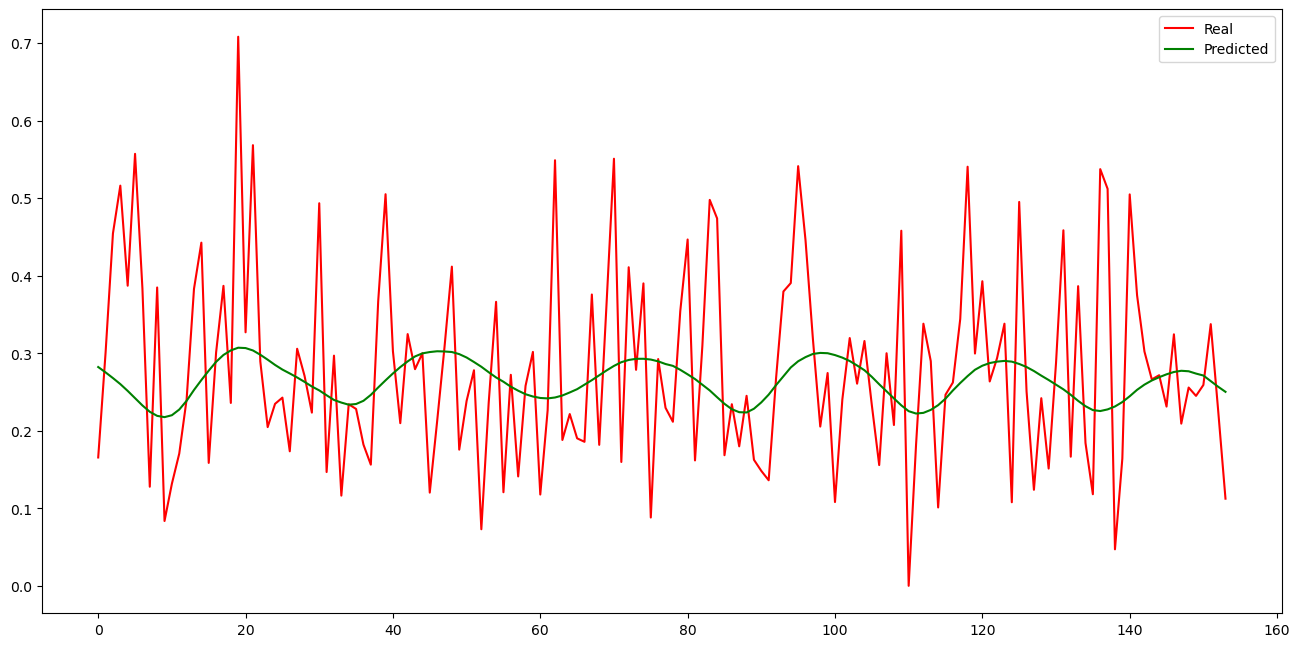

In [102]:
y_pred = regressor.predict(X_test)

plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(y_test, color='red', label = 'Real')
plt.plot(y_pred, color='green', label = 'Predicted')
plt.legend(loc='best')